## 
## 
## lol 制作test set2

## 分割之后作为训练数据



In [1]:
from tqdm import tqdm
import os
from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import shutil
source_l = './mit/expertC_gt'
source_h = './mit/input'
png_l = './mit_png/input'
png_h = './mit_png/groundtruth'
mit_10_l = './mit_10/input'
mit_10_h = './mit_10/groundtruth'
mit_40_l = './mit_40/input'
mit_40_h = './mit_40/groundtruth'
mit_450_l = './mit_450/input'
mit_450_h = './mit_450/groundtruth'



In [10]:
# jpg 转 png
# for file in tqdm(os.listdir(source_l)):
#   im = Image.open(os.path.join(source_l, file))
#   file = file.split('-')[0]+'.png'
#   im.save(os.path.join(png_l, file))
# for file in tqdm(os.listdir(source_h)):
#   im = Image.open(os.path.join(source_h, file))
#   file = file.split('-')[0]+'.png'
#   im.save(os.path.join(png_h, file))


100%|██████████| 500/500 [54:08<00:00,  6.50s/it]


In [18]:
# 挑选10张作为test，40张作为valid
valid = [4501,4540]
test = [4555,4563,4568,4617,4628,4766,4785,4978,4984,4993]
for name in test:
  file = 'a' + str(name) +'.png'
  shutil.move(os.path.join(png_l, file),os.path.join(mit_10_l, file))
  shutil.move(os.path.join(png_h, file),os.path.join(mit_10_h, file))
for name in range(4501,4540):
  file = 'a' + str(name) +'.png'
  shutil.move(os.path.join(png_l, file),os.path.join(mit_40_l, file))
  shutil.move(os.path.join(png_h, file),os.path.join(mit_40_h, file))

  0%|          | 0/451 [00:00<?, ?it/s]

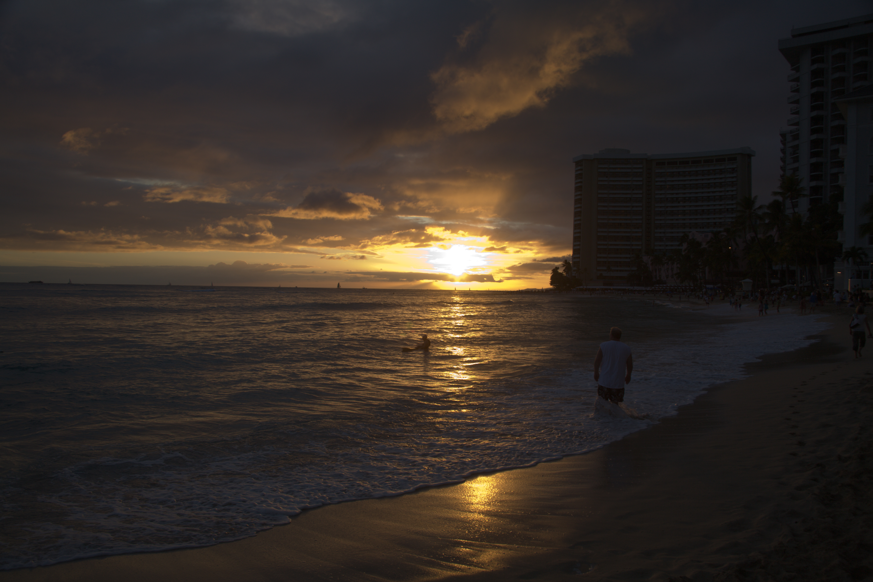

  0%|          | 0/451 [00:00<?, ?it/s]


In [8]:
mit_train_l = '../datasets/mit500/train/input'
mit_train_h = '../datasets/mit500/train/groundtruth'
mit_valid_l = '../datasets/mit500/valid/input'
mit_valid_h = '../datasets/mit500/valid/groundtruth'

#对train和valid做分割
#原图resize成256*256

#将原图resize长宽各一半，切割成256*256的块，取1/4

#原图，取 1/8 或 1/9

for file in tqdm(os.listdir(mit_40_l)):
  img = Image.open(os.path.join(mit_40_l, file))
  w,h = img.size

  # 256*256小图
  im = img.resize((256,256))
  # im.save(os.path.join(save_gt_path,file.split('.')[0] + '_1.png'))
  # 长宽除以四，隔一个取一个
  im = img.resize((w//4,h//4))
  
  im.show()
  break
  # im.save(os.path.join(png_l, file))


In [5]:
mit_test_l = '../datasets/mit500/test/input'
mit_test_h = '../datasets/mit500/test/groundtruth'
for file in tqdm(os.listdir(mit_10_h)):
  img = Image.open(os.path.join(mit_10_h, file))
  w,h = img.size
  im = img.resize((256,256))
  # 长宽减半
  im = img.resize((w//6,h//6))
  im.save(os.path.join(mit_test_h, file))


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]
